# **Outlier Deteksi**
## **Penjelasan Outlier Deteksi**
### Apa Itu Outlier Deteksi?  
Outlier deteksi adalah proses untuk mengidentifikasi data yang berada jauh dari pola atau distribusi mayoritas data dalam sebuah dataset. Data outlier bisa jadi merupakan kesalahan pengukuran, data yang sangat jarang terjadi, atau bahkan bisa memberikan wawasan penting terkait fenomena atau kejadian yang tidak biasa.

Outlier bisa berdampak buruk pada model analisis data dan dapat menyebabkan distorsi dalam hasil, karena model yang dilatih bisa sangat sensitif terhadap nilai-nilai yang ekstrem. Oleh karena itu, penting untuk mendeteksi dan menangani outlier agar analisis yang dilakukan lebih akurat.

In [1]:
%pip install pymysql
%pip install psycopg2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 1.6 MB/s eta 0:00:00


Perintah %pip install pymysql dan %pip install psycopg2 digunakan untuk menginstal pustaka yang memungkinkan Python berinteraksi dengan database MySQL dan PostgreSQL. pymysql digunakan untuk menghubungkan dan beroperasi dengan database MySQL, sementara psycopg2 berfungsi untuk berkomunikasi dengan database PostgreSQL. Dengan menginstal kedua pustaka ini, aplikasi Python dapat melakukan berbagai operasi database seperti query, insert, update, dan delete. Selain itu, penggunaan %pip install dalam Jupyter Notebook memungkinkan instalasi pustaka langsung dari dalam lingkungan notebook tanpa perlu menggunakan terminal atau command prompt.

 id           class  petal length  petal width  sepal_length  sepal_width  distance  outlier
  1     Iris-setosa           1.4          0.2           5.1          3.5  5.424942    False
  2     Iris-setosa          14.0          2.0          40.9         30.0 46.407542     True
  3     Iris-setosa           1.3          0.2           4.7          3.2  5.430470    False
  4     Iris-setosa           1.5          0.2           4.6          3.1  5.273519    False
  5     Iris-setosa           1.4          0.2           5.0          3.6  5.485435     True
  6     Iris-setosa           1.7          0.4           5.4          3.9  5.288667    False
  7     Iris-setosa           1.4          0.3           4.6          3.4  5.412947    False
  8     Iris-setosa           1.5          0.2           5.0          3.4  5.325411    False
  9     Iris-setosa           1.4          0.2           4.4          2.9  5.316014    False
 10     Iris-setosa           1.5          0.1           4.9          

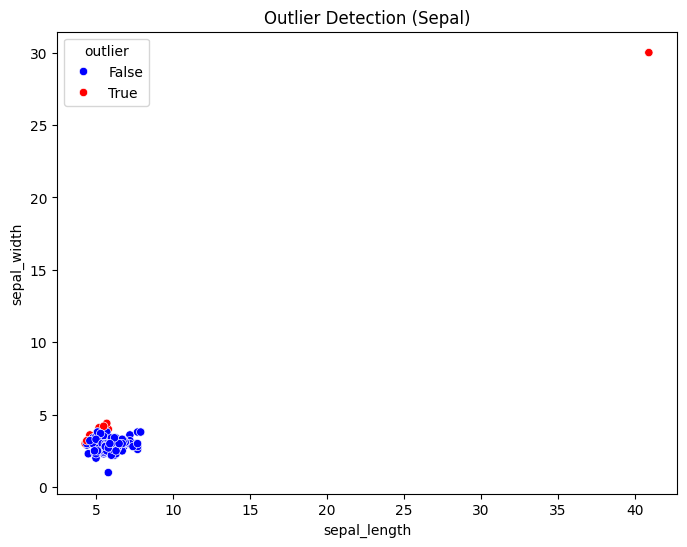

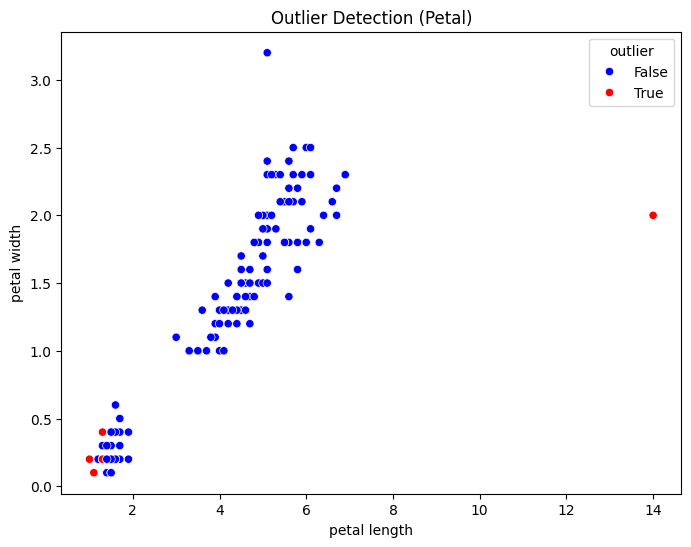

In [2]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean

def get_pg_data():
    conn = psycopg2.connect(
        host="pg-34d4055e-posgressqlpendataaa.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_IRjo23jQlvziN0aBC2-",
        database="defaultdb",
        port=11481
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM auli.postgree")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-2186ab10-mysqllpendataa.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_gSUa0lC7yXa5Ia5faIY",
        database="najma",
        port=24481
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM flowers")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil data fitur numerik
feature_columns = ["petal length", "petal width", "sepal_length", "sepal_width"]
data_values = df_merged[feature_columns].values

# Ambil referensi dari baris terakhir (baris ke-152 jika dihitung dari 1, atau index -1)
reference_point = data_values[-1]

def compute_distances(data, reference):
    return np.array([euclidean(row, reference) for row in data])

# Hitung jarak Euclidean dari setiap baris ke referensi
df_merged["distance"] = compute_distances(data_values, reference_point)

# Tentukan threshold outlier berdasarkan persentil ke-95 (bisa disesuaikan)
threshold = np.percentile(df_merged["distance"], 93.5)
df_merged["outlier"] = df_merged["distance"] > threshold

# Cetak hasil data dengan outlier
print(df_merged.to_string(index=False))

# Visualisasi scatter plot dengan warna berdasarkan outlier
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_merged["sepal_length"], y=df_merged["sepal_width"],
    hue=df_merged["outlier"], palette={False: "blue", True: "red"}
)
plt.title("Outlier Detection (Sepal)")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_merged["petal length"], y=df_merged["petal width"],
    hue=df_merged["outlier"], palette={False: "blue", True: "red"}
)
plt.title("Outlier Detection (Petal)")
plt.show()


Kode di atas melakukan deteksi outlier menggunakan jarak Euclidean pada data bunga yang diperoleh dari dua database berbeda: PostgreSQL dan MySQL. Berikut adalah kesimpulannya:

1. Pengambilan Data:
- Data dari tabel auli.postgree di PostgreSQL dan flowers di MySQL diambil menggunakan psycopg2 dan pymysql.
- Kedua dataset digabungkan berdasarkan kolom id dan class menggunakan operasi merge dengan metode inner join.

2. Perhitungan Jarak Euclidean:
- Digunakan fitur numerik seperti petal length, petal width, sepal_length, dan sepal_width sebagai parameter perhitungan.
- Jarak Euclidean dihitung untuk setiap baris terhadap titik referensi (baris terakhir dalam dataset gabungan).

3. Identifikasi Outlier:
- Outlier ditentukan berdasarkan nilai jarak yang melebihi persentil ke-93.5.
- Baris dengan jarak di atas threshold dianggap sebagai outlier.

4. Visualisasi Outlier:
- Scatter plot dibuat menggunakan Seaborn dan Matplotlib untuk menunjukkan outlier.
- Data sepal dan petal divisualisasikan secara terpisah, dengan outlier ditandai menggunakan warna merah.

Kesimpulannya, metode ini berhasil mendeteksi outlier dalam dataset berdasarkan perbedaan karakteristik bunga menggunakan jarak Euclidean. Scatter plot membantu dalam memahami pola dan distribusi outlier dalam fitur sepal dan petal.

In [3]:
# Hitung total outlier
total_outliers = df_merged["outlier"].sum()
print(f"Total Outlier: {total_outliers}")


Total Outlier: 10


Kode tersebut menghitung jumlah total outlier dalam dataset gabungan dengan menjumlahkan nilai True dalam kolom "outlier", yang menunjukkan data yang melebihi ambang batas berdasarkan jarak Euclidean. Hasil yang diperoleh memberikan informasi tentang seberapa banyak sampel yang dianggap sebagai outlier setelah analisis dilakukan. Dengan mengetahui jumlah total outlier, pengguna dapat lebih memahami distribusi data, melakukan pembersihan data jika diperlukan, atau menganalisis lebih lanjut untuk menemukan pola atau penyebab outlier dalam dataset.

In [4]:
# Urutkan data berdasarkan jarak dari terkecil ke terbesar
df_sorted = df_merged.sort_values(by="distance", ascending=True)

# Tampilkan hasilnya
print(df_sorted.to_string(index=False))

 id           class  petal length  petal width  sepal_length  sepal_width  distance  outlier
151             ???           5.1          3.2           5.8          1.0  0.000000    False
114  Iris-virginica           5.0          2.0           5.7          2.5  1.926136    False
115  Iris-virginica           5.1          2.4           5.8          2.8  1.969772    False
147  Iris-virginica           5.0          1.9           6.3          2.5  2.049390    False
120  Iris-virginica           5.0          1.5           6.0          2.2  2.092845    False
102  Iris-virginica           5.1          1.9           5.8          2.7  2.140093    False
143  Iris-virginica           5.1          1.9           5.8          2.7  2.140093    False
122  Iris-virginica           4.9          2.0           5.6          2.8  2.181742    False
 69 Iris-versicolor           4.5          1.5           6.2          2.2  2.202272    False
133  Iris-virginica           5.6          2.2           6.4          

Dengan mengurutkan data berdasarkan jarak, kita dapat melihat observasi yang paling mirip dengan titik referensi di bagian atas daftar, sementara observasi yang paling berbeda (termasuk kemungkinan outlier) berada di bagian bawah. Hal ini membantu dalam memahami distribusi jarak dalam dataset serta mempermudah analisis lebih lanjut, seperti mengidentifikasi pola yang muncul di antara data yang memiliki jarak kecil atau besar.